# Visualisations and Descriptives

## Descriptives

In [16]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# create uniform colour palette
palette ={"NEU": "#b2b2b2", "NEG": "#ff8f8f", "POS": "#00FF00"}
# set uniform figure size
sns.set(rc={'figure.figsize':(9,6.36)})
# set seaborne style
sns.set_style('whitegrid')

In [6]:
# load data
df = pd.read_csv("dataset_token_ready.csv")
with open("dataset_sentiment.pkl", "rb") as f:
    dfa = pickle.load(f)

In [7]:
# define regex to search for mentions of president Ortega
regex = r'([Oo]rtega)|([Nn]uestro [Pp]residente)|[Pp]residente de [Nn]icaragua|([Cc]omandante [Dd]aniel)|[Dd]aniel y [Rr]osario'

# create dummy to count ortega mention
df["mention"] = df['text'].str.contains(regex, na = False)

<ipython-input-7-06dfcaf2f83e>:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["mention"] = df['text'].str.contains(regex, na = False)


In [15]:
# what is the share of articles per outlet mentioning Ortega?
df.groupby("page").agg({"mention":np.sum})/df.groupby("page").agg({"mention":np.size})

,mention
page,
100% Noticias,0.431460
Canal10,0.019584
Canal13,0.103444
Canal14,0.144416
Canal2,0.121305
Canal4,0.214021
Canal6,0.228879
Confidencial,0.682199
Radio 800,0.106832


In [18]:
# create position categories
outlets = dfa.page.unique().tolist()

key = ["neutral",
      "regime",
      "regime",
      "opposition",
      "regime",
      "neutral",
      "opposition",
      "regime",
      "regime",
      "regime",
      "neutral",
      "opposition"]

# create categories
dfa["position"] = dfa["page"].replace(outlets, key)
df["position"] = df["page"].replace(outlets, key)

<AxesSubplot:xlabel='year', ylabel='mention'>

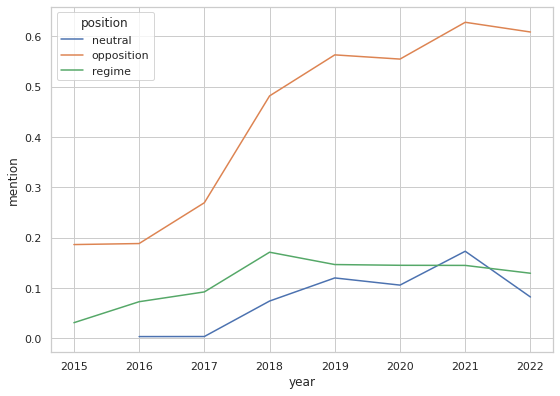

In [31]:
# percentage of Ortega-mentioning articles per year and outlet
# 
data = (df.groupby(["position", "year"])
 .agg({"mention":np.sum})/
 df.groupby(["position", "year"])
 .agg({"mention":np.size})).reset_index()

sns.lineplot(data = data.loc[data["year"]> 2014] ,x="year", y="mention", hue="position")

In [153]:
# create table to see how many mentions per outlet per year
pd.pivot(dfa.groupby(["page", "year"]).agg({"sentences":np.size}).reset_index(), index = "page", columns = "year", values = "sentences")

year,2011.0,2012.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
page,,,,,,,,,,,
100% Noticias,NaN,NaN,NaN,374.0,334.0,49.0,3311.0,1533.0,6125.0,9330.0,1171.0
Canal10,NaN,NaN,NaN,NaN,14.0,13.0,81.0,92.0,54.0,NaN,NaN
Canal13,2.0,21.0,71.0,72.0,638.0,666.0,1013.0,891.0,807.0,963.0,80.0
Canal14,NaN,NaN,NaN,NaN,NaN,1.0,244.0,428.0,360.0,385.0,39.0
Canal2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,315.0,58.0
Canal4,NaN,NaN,NaN,NaN,NaN,203.0,2427.0,1033.0,337.0,896.0,114.0
Canal6,NaN,NaN,NaN,NaN,NaN,NaN,10.0,286.0,323.0,1001.0,147.0
Confidencial,NaN,NaN,NaN,772.0,2063.0,1655.0,4263.0,4073.0,3756.0,5572.0,900.0
Radio 800,NaN,NaN,NaN,NaN,NaN,NaN,44.0,29.0,27.0,15.0,NaN


In [55]:
# descriptives

dfa.groupby("position")['sentiment'].value_counts(normalize=True)

position    sentiment
neutral     NEU          0.696599
            NEG          0.291711
            POS          0.011690
opposition  NEU          0.581024
            NEG          0.412684
            POS          0.006291
regime      NEU          0.726679
            POS          0.223545
            NEG          0.049776
Name: sentiment, dtype: float64

In [ ]:
# total change in sentiment over years
df_short = dfa[["year", "position"]]
df_short.groupby("year").agg({"position":})

In [94]:
# create aggregated overview of sentiment per year
df_agg = (dfa.groupby(["position", "year"])["sentiment"]
 .value_counts(normalize=True)
 .rename("proportion")
 .reset_index())

<AxesSubplot:xlabel='year', ylabel='proportion'>

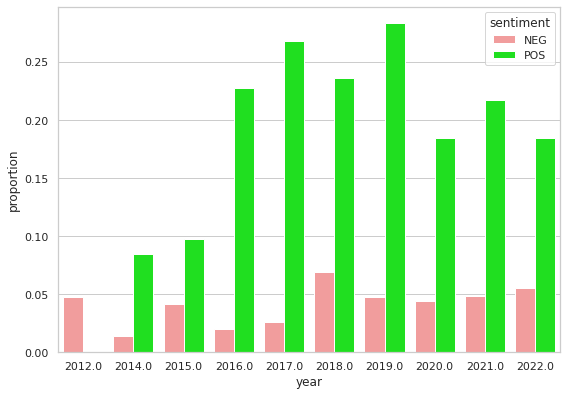

In [132]:
# for regime
(df_agg
 .loc[(df_agg["position"]=="regime") & (df_agg["sentiment"]!="NEU") & (df_agg["year"]> 2011)]
 .pipe((sns.barplot, "data"),
       x="year", y="proportion",
       hue="sentiment", palette = palette))

<AxesSubplot:xlabel='year', ylabel='proportion'>

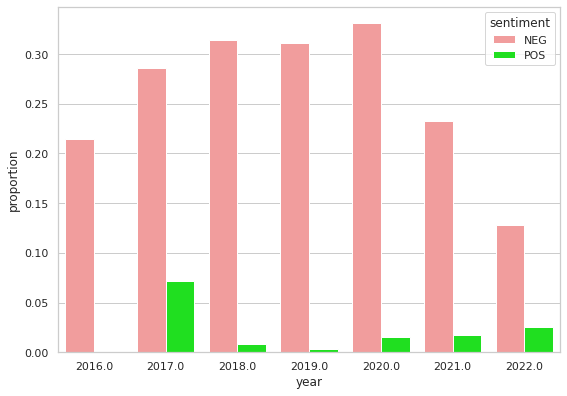

In [133]:
# neutral
(df_agg
 .loc[(df_agg["position"]=="neutral") & (df_agg["sentiment"]!="NEU") & (df_agg["year"]> 2011)]
 .pipe((sns.barplot, "data"),
       x="year", y="proportion",
       hue="sentiment", palette = palette))

<AxesSubplot:xlabel='year', ylabel='proportion'>

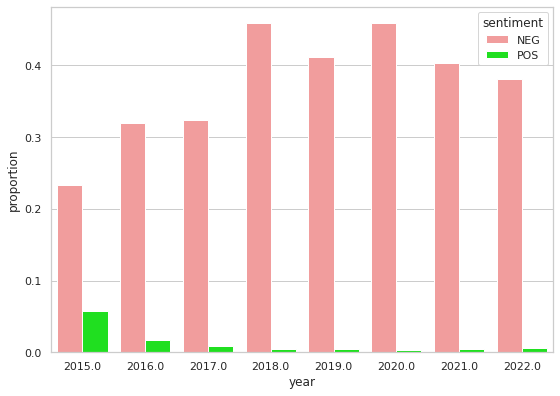

In [134]:
# neutral
(df_agg
 .loc[(df_agg["position"]=="opposition") & (df_agg["sentiment"]!="NEU") & (df_agg["year"]> 2011)]
 .pipe((sns.barplot, "data"),
       x="year", y="proportion",
       hue="sentiment", palette = palette))

<AxesSubplot:xlabel='year', ylabel='proportion'>

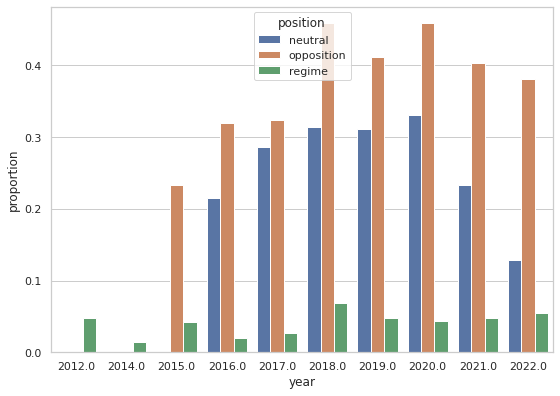

In [136]:
# all positions, but only negative
(df_agg
 .loc[(df_agg["sentiment"]=="NEG") & (df_agg["year"]> 2011)]
 .pipe((sns.barplot, "data"),
       x="year", y="proportion",
       hue="position"))

<AxesSubplot:xlabel='year', ylabel='proportion'>

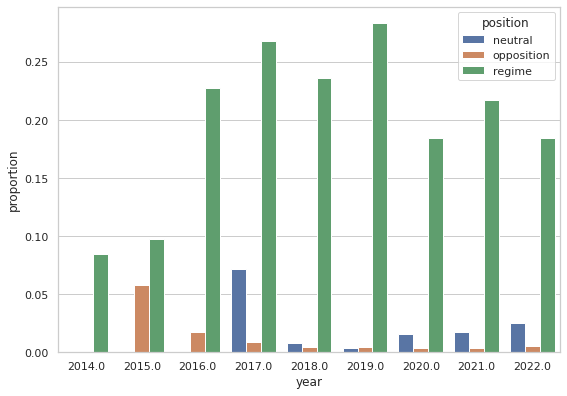

In [137]:
# all positions, but only negative
(df_agg
 .loc[(df_agg["sentiment"]=="POS") & (df_agg["year"]> 2011)]
 .pipe((sns.barplot, "data"),
       x="year", y="proportion",
       hue="position"))

In [82]:
df_agg

,position,year,sentiment,proportion
0,neutral,2016.0,NEU,0.785714
1,neutral,2016.0,NEG,0.214286
2,neutral,2017.0,NEU,0.642857
3,neutral,2017.0,NEG,0.285714
4,neutral,2017.0,POS,0.071429
...,...,...,...,...
70,regime,2021.0,POS,0.217441
71,regime,2021.0,NEG,0.048374
72,regime,2022.0,NEU,0.760593
73,regime,2022.0,POS,0.184322


In [61]:
dfa.groupby(["position", "year"]).agg({"sentiment":np.count()})

AttributeError: module 'numpy' has no attribute 'count'